# Approaching Life Goals Like Business Goals

- Author: Aaron Gillespie  
- Date: 2025-04-22

This repository is being created in service of Northwest Missouri State University 44632 Module 7 - but also just as a check-in on my progress year-to-date on [my annual goals](https://aarongilly.com/Columns/467).

> [!TIP]
> This Jupyter Notebook will be mostly a means to an end. The README.md is my primary product.

My goals for the year are across four broad categories:

1. [Health](#Health Goals)
2. [Consumption](#Consumption Goals)
3. [Creation](#Creation Goals)
4. [Experience](#Experience Goals)

First some boilerplate.

In [1]:
# Standard Data Analysis Library Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Standard Library Imports
import os

In [2]:

# Dictionary to store DataFrames
dataframes = {}

# Iterate through all files in the data/ folder
for file in os.listdir('../data/'):
    if file.endswith('.csv'):
        # Create a DataFrame for each CSV file
        df_name = file.split('.')[0]  # Use the file name (without extension) as the key
        dataframes[df_name] = pd.read_csv(os.path.join('../data/', file))

# Display the names of the imported DataFrames
print("Imported DataFrames:", list(dataframes.keys()))

Imported DataFrames: ['Diet', 'VO2', 'Oura', 'Hevy', 'Cardio', 'Content', 'Data_Journal']


All my goals are year-to-date based. So where are we at this year, as of today?

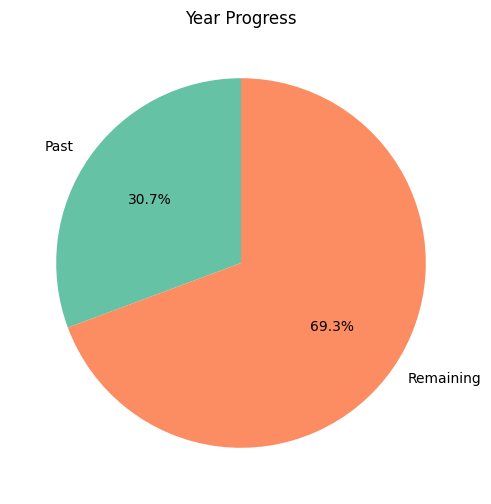

In [3]:
from datetime import datetime

# Calculate the number of days in the year and the current day of the year
today = datetime(2025, 4, 22)
start_of_year = datetime(today.year, 1, 1)
end_of_year = datetime(today.year, 12, 31)
days_in_year = (end_of_year - start_of_year).days + 1
days_passed = (today - start_of_year).days + 1
days_remaining = days_in_year - days_passed

# Data for the pie chart
data = [days_passed, days_remaining]
labels = ['Past', 'Remaining']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Year Progress')
plt.show()

## Health Goals

My health goals are split into leading indicators and lagging indicators because [leading indicators measure strategy adherence and lagging indicators measure strategy effectiveness](https://gillespedia.com/Leading+indicators+measure+strategy+adherence+and+lagging+indicators+measure+strategy+effectiveness).

### Move Bedtime Toward 11PM & Wake Toward 7AM

In [4]:
days_with_data = dataframes['Data_Journal'].dropna(subset=['Bedtime', 'Wake'])

# Convert the "Date" column to a consistent datetime format
days_with_data = days_with_data.copy()
days_with_data['Date'] = pd.to_datetime(days_with_data['Date'], format='%m/%d/%y', errors='coerce')
days_2024 = days_with_data[days_with_data['Date'].dt.year == 2024]
days_2025 = days_with_data[days_with_data['Date'].dt.year == 2025]

# Some bedtimes are after midnight - simply averaging them causes
# the "average" of something like 1am and 11pm to look like noon, when
# in reality it *should* be midnight. I handle this in the dataset already
# in the "Bedtime Wrapped" column, which adds 1 to any bedtimes after midnight
# represented the way Excel represents times, as fractions of a whole day.

# Calculate the average of the "Bedtime Wrapped" column
overall_average = days_with_data['Bedtime Wrapped'].mean()
average_bedtime_2024 = days_2024['Bedtime Wrapped'].mean()
average_bedtime_2025 = days_2025['Bedtime Wrapped'].mean()

# Convert the proportion of the day to a time of day
average_bedtime_seconds = overall_average * 24 * 60 * 60  # Convert days to seconds
average_bedtime_time = datetime.utcfromtimestamp(average_bedtime_seconds).time()

average_bedtime_seconds_2024 = average_bedtime_2024 * 24 * 60 * 60  # Convert days to seconds
average_bedtime_time_2024 = datetime.utcfromtimestamp(average_bedtime_seconds_2024).time()

average_bedtime_seconds_2025 = average_bedtime_2025 * 24 * 60 * 60  # Convert days to seconds
average_bedtime_time_2025 = datetime.utcfromtimestamp(average_bedtime_seconds_2025).time()

print("Average Bedtime:", average_bedtime_time)
print("2024 Average:", average_bedtime_time_2024)
print("2025 Average:", average_bedtime_time_2025)

Average Bedtime: 23:24:42.580322
2024 Average: 23:48:38.981983
2025 Average: 23:53:04.391776


/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_26002/1743760753.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  average_bedtime_time = datetime.utcfromtimestamp(average_bedtime_seconds).time()
/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_26002/1743760753.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  average_bedtime_time_2024 = datetime.utcfromtimestamp(average_bedtime_seconds_2024).time()
/var/folders/hk/h6rz0nm939n_y0ssynfrg63r0000gn/T/ipykernel_26002/1743760753.py:28: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a futur

In [5]:
from datetime import datetime, timedelta

def calculate_average_time(df, column):
    # Convert the time strings to seconds since midnight
    times_in_seconds = df[column].apply(lambda x: (datetime.strptime(x, '%I:%M:%S %p') - datetime(1900, 1, 1)).total_seconds())
    # Calculate the average time in seconds
    average_seconds = times_in_seconds.mean()
    # Convert the average seconds back to a time object
    average_time = (datetime(1900, 1, 1) + timedelta(seconds=average_seconds)).time()
    return average_time

# Calculate the average "Wake" time for each dataframe
average_wake_days_with_data = calculate_average_time(days_with_data, 'Wake')
average_wake_days_2024 = calculate_average_time(days_2024, 'Wake')
average_wake_days_2025 = calculate_average_time(days_2025, 'Wake')

# Print the results
print("Average Wake Time (days_with_data):", average_wake_days_with_data)
print("Average Wake Time (days_2024):", average_wake_days_2024)
print("Average Wake Time (days_2025):", average_wake_days_2025)

Average Wake Time (days_with_data): 07:02:14.533649
Average Wake Time (days_2024): 07:38:26.781870
Average Wake Time (days_2025): 07:51:54.934579


So, not good. Going the wrong way on this one. 

The visualization I'd like is going to be much more difficult to construct using visualization tools, so in this case I'll draw it out:

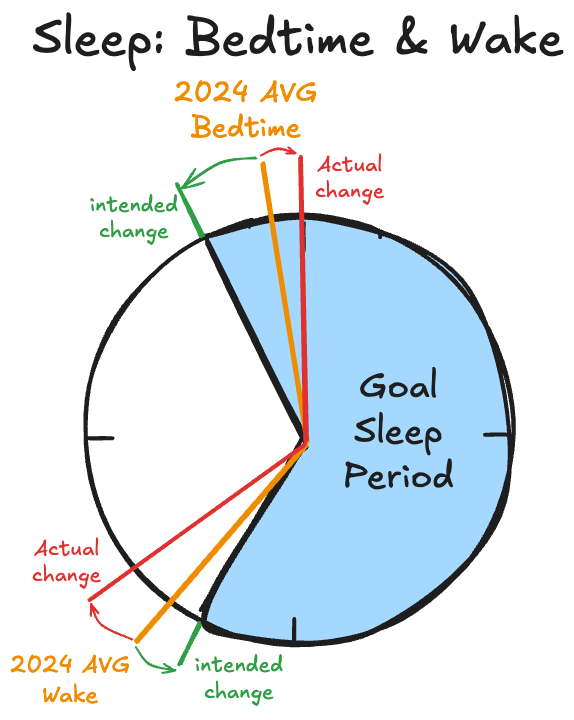

### Work out 183 times, balancing 1/2 strength, 1/3 cardio, & 1/6 mobility 

Workouts I actually handled via [a drillable Google Looker Studio dashboard](https://lookerstudio.google.com/reporting/6035f948-6b20-4191-85d7-f9a2c4eedfd7/page/6bkHF?s=vOWQuhkzgso). A snapshot of which I'll give here:

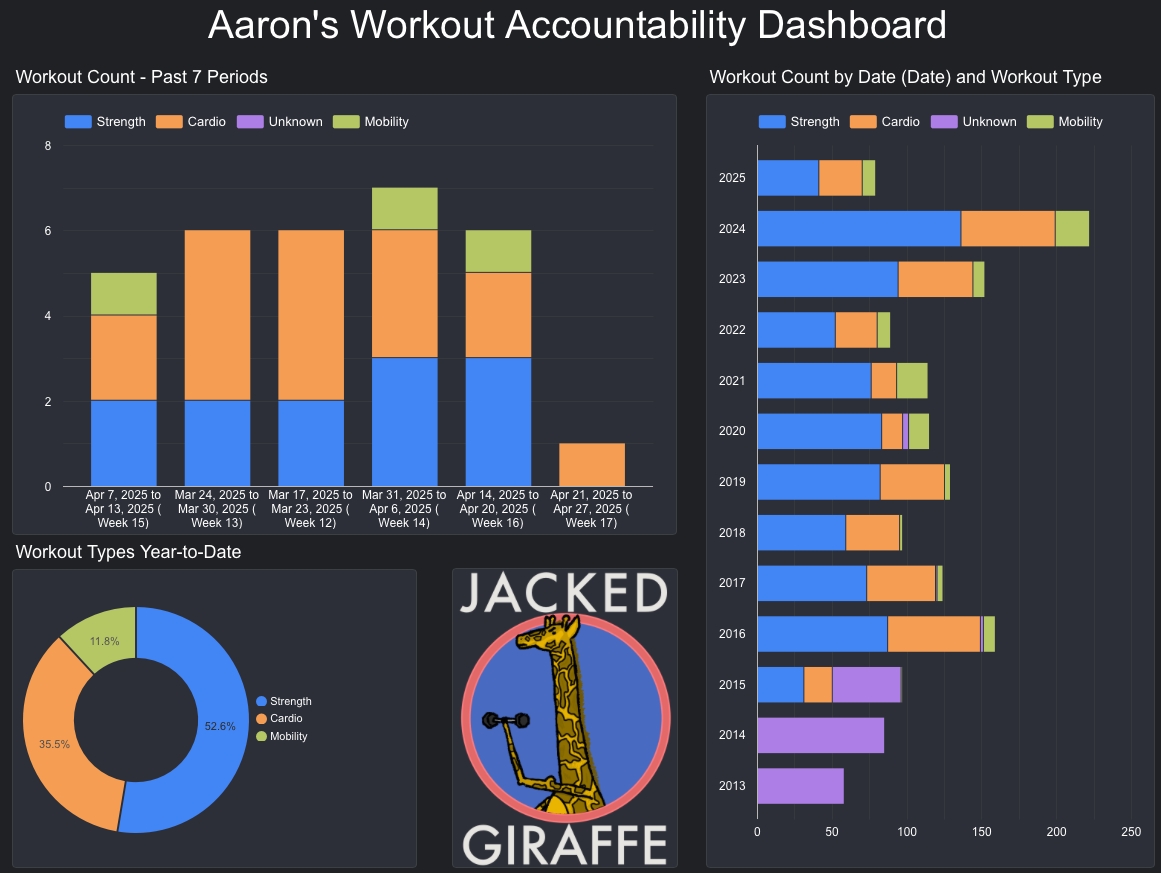


### eat out fewer than 156 times & drink fewer than 156 non-water/coffee/teas

<Figure size 1000x600 with 0 Axes>

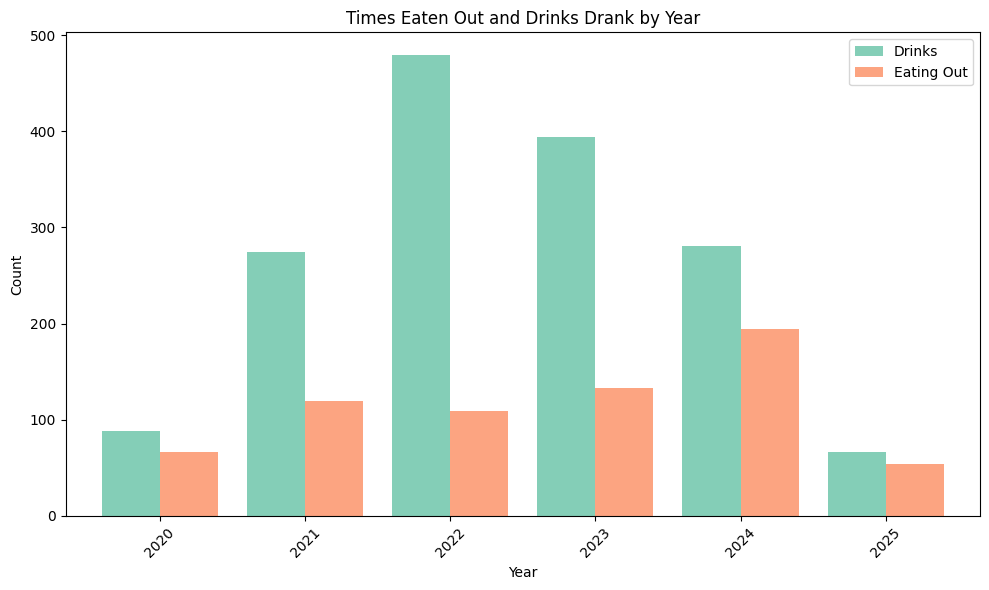

Sum of Eating Out in 2025: 54
Sum of Drinks in 2025: 67.0


In [6]:
# Group by year and calculate the sum of the "Drinks" column
drinks_by_year = dataframes['Data_Journal'].groupby('Year')['Drinks'].sum()
# Filter out years before 2020 - started tracking in late 2019
drinks_by_year = drinks_by_year[drinks_by_year.index >= 2020]

# Group by year and calculate the sum of the "Ate Out" column
eating_out_by_year = dataframes['Data_Journal'].groupby('Year')['Ate Out'].sum()
# Filter out years before 2020 - started tracking in late 2019
eating_out_by_year = eating_out_by_year[eating_out_by_year.index >= 2020]

# Combine the two series into a DataFrame for easier plotting
combined_data = pd.DataFrame({'Drinks': drinks_by_year, 'Eating Out': eating_out_by_year})

# Plot both series as grouped bar charts
plt.figure(figsize=(10, 6))
combined_data.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#66c2a5', '#fc8d62'], alpha=0.8)
plt.title('Times Eaten Out and Drinks Drank by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Drinks', 'Eating Out'])
plt.tight_layout()
plt.show()

# Calculate and print the sum of eating out and drinks in 2025
sum_eating_out_2025 = eating_out_by_year.loc[2025]
sum_drinks_2025 = drinks_by_year.loc[2025]

print("Sum of Eating Out in 2025:", sum_eating_out_2025)
print("Sum of Drinks in 2025:", sum_drinks_2025)

## Consumption Goals

I track four times of media consumed. My goals for each are:

- read 20 books
- watch 36 (new) movies
- play 3 (new) videogames
- watch TV around 75 times

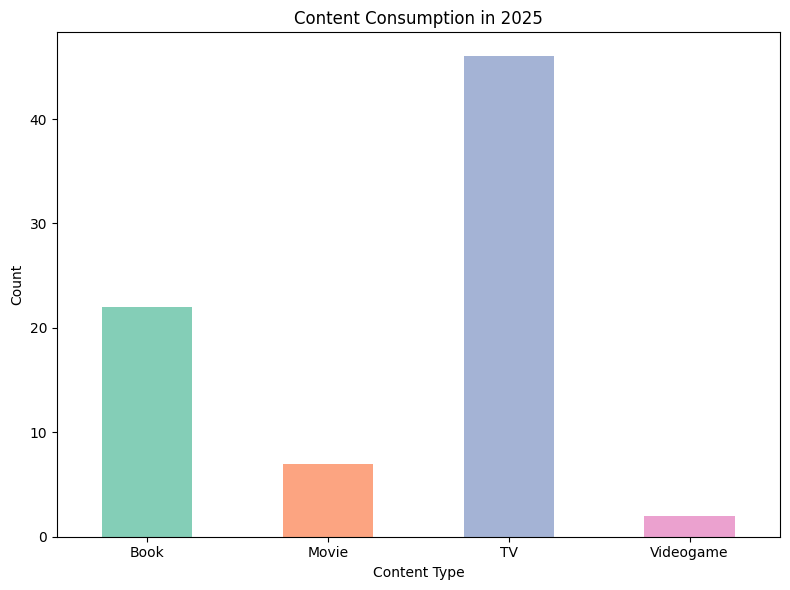

In [7]:
# Filter the Data_Journal dataframe for the year 2025
data_2025 = dataframes['Data_Journal'][dataframes['Data_Journal']['Year'] == 2025]

# Calculate the sums for each column
sums_2025 = data_2025[['Book', 'Movie', 'TV', 'Videogame']].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sums_2025.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], alpha=0.8)
plt.title('Content Consumption in 2025')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Now - this chart doesn't *perfectly* show the results towards each of the four goals. That shows book reading *sessions*, not unique books read. Also that shows *total* movies, not *new* movies. The necessary qualifying data aren't in this sanitized dataset. So I'll have to add those as commentary. 

## Creation Goals

I have enough data to cover a couple of these goals. 

In [8]:
# Display basic information about the Content DataFrame
print("Content DataFrame Info:")
print(dataframes['Content'].info())

# Display the first few rows of the Content DataFrame
print("\nFirst few rows of the Content DataFrame:")
print(dataframes['Content'].head())

# Display summary statistics of the Content DataFrame
print("\nSummary statistics of the Content DataFrame:")
print(dataframes['Content'].describe(include='all'))

Content DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2452 non-null   object
 1   title     473 non-null    object
 2   date      2380 non-null   object
dtypes: object(3)
memory usage: 57.6+ KB
None

First few rows of the Content DataFrame:
                  Filename title        date
0               Tickler.md   NaN  2024-08-14
1             Archetype.md   NaN  2024-05-28
2   HBR "Life Strategy".md   NaN  2024-01-26
3            Area Chart.md   NaN         NaN
4  Convergent Evolution.md   NaN  2024-02-26

Summary statistics of the Content DataFrame:
          Filename                                title        date
count         2452                                  473        2380
unique        2452                                  473         733
top     Tickler.md  #28 - TL;DR: California is Awesome.  2023-07-08
freq

Projected notes for 2025: 433.2247557003257


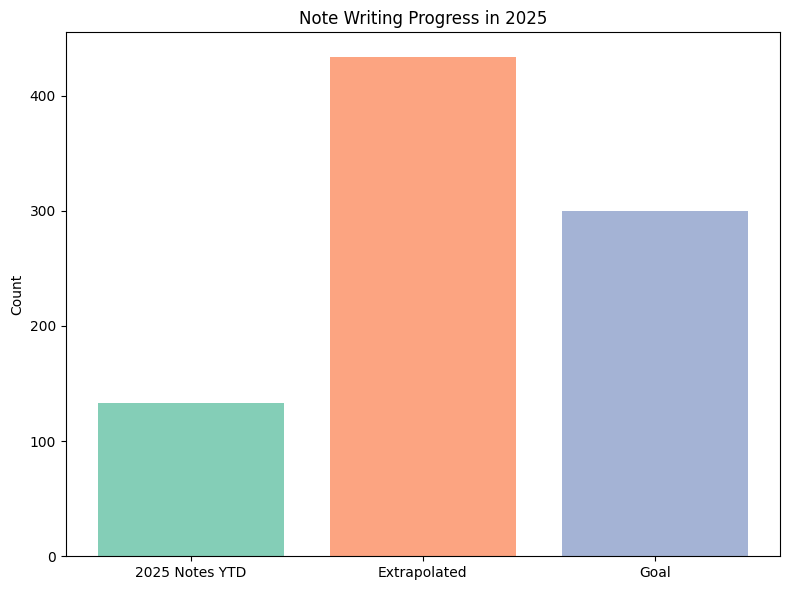

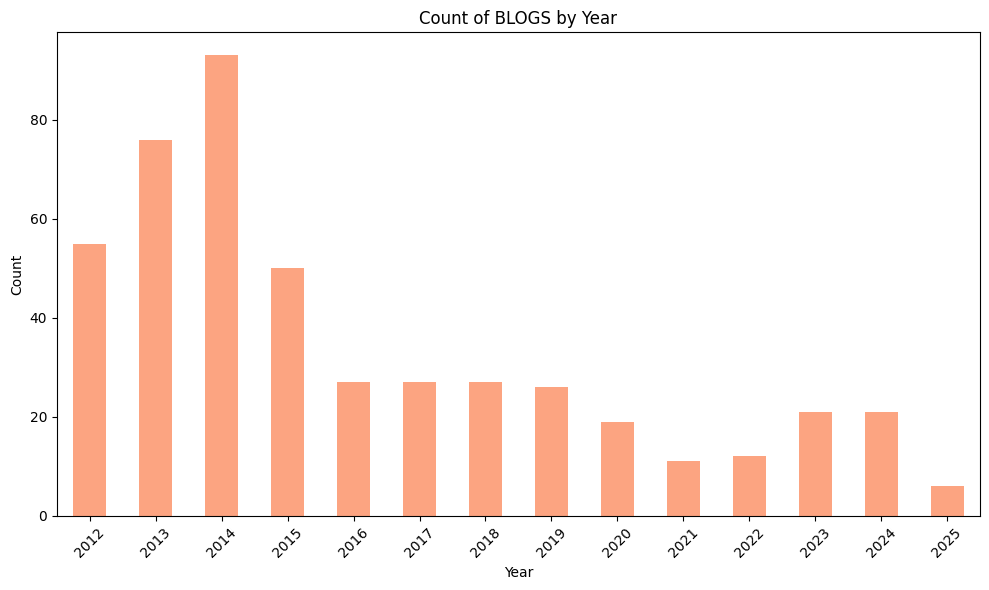

In [17]:
# Drop rows with blanks in the "date" column
dataframes['Content'] = dataframes['Content'].dropna(subset=['date'])

# Truncate the "date" column to the first 10 characters
dataframes['Content']['date'] = dataframes['Content']['date'].str[:10]

# Add a new feature
dataframes['Content']['type'] = dataframes['Content']['title'].isnull().replace({True: 'NOTE', False: 'BLOG'})

# Extract the year from the "date" column and create a new column "year"
dataframes['Content']['year'] = pd.to_datetime(dataframes['Content']['date']).dt.year

# Group by "year" and "type" and count the occurrences
content_counts = dataframes['Content'].groupby(['year', 'type']).size().unstack(fill_value=0)
# Separate the data into two DataFrames for NOTES and BLOGS
notes_counts = content_counts['NOTE']
blogs_counts = content_counts['BLOG']

projected_notes = notes_counts[2025] / 0.307
goal = 300

print("Projected notes for 2025:", projected_notes)

# Create a bar chart for notes_counts[2025], projected_notes, and goal
plt.figure(figsize=(8, 6))
categories = ['2025 Notes YTD', 'Extrapolated', 'Goal']
values = [notes_counts[2025], projected_notes, goal]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.bar(categories, values, color=colors, alpha=0.8)
plt.title('Note Writing Progress in 2025')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot the bar chart for BLOGS
blogs_counts.plot(kind='bar', figsize=(10, 6), color='#fc8d62', alpha=0.8)
plt.title('Count of BLOGS by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


That's 133 notes, 6 blog posts. 

## Experience Goals

Doing things! 

- see friends 26 times
- see family 26 times
- go on 13 dates
- see 4 concerts
- do 13 fun outings of other types (e.g. bowling)

Again I've turn to Google's Looker to produce the following dashboard:

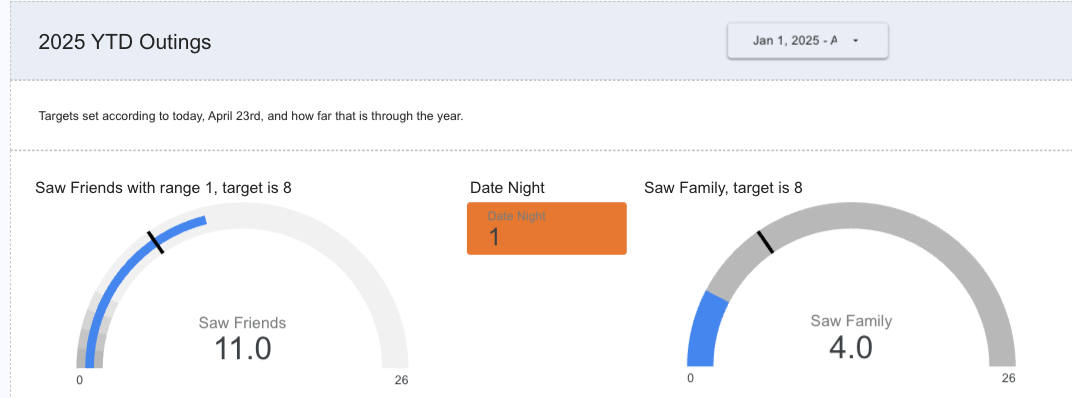

Regarding concerts and other outings - those aren't in the dataset in this repo either. I'll manage both of those offline.